<a href="https://colab.research.google.com/github/enakai00/rl_book_solutions/blob/master/Chapter08/Exercise_8_8_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8.8 : Solution

In [0]:
import numpy as np
from numpy import random
from pandas import DataFrame

In [0]:
class Model:
  def __init__(self, states=1000, b=3):
    self.states = states
    self.b = b
    self.branches = {}
    for s in range(states):
      for a in range(2):
        sa = "{:06},{:02}".format(s, a)
        self.branches[sa] = list(zip(random.randint(states, size=b),
                                random.normal(0, 1, size=b))) # (state, reward)

class Agent:
  def __init__(self, model):
    self.model = model
    self.q = {}
    self.v = [0] * model.states
    self.result = []
    self.memory = {}
    for s in range(model.states):
      for a in range(2):
        sa = "{:06},{:02}".format(s, a)
        self.q[sa] = 0

  def add_result(self, debug=False):
    v = 0
    n = 100
    for _ in range(n):
      s = 0
      while True:
        if random.randint(10) == 0:
          break
        a = optimal_action(self, s)
        sa = "{:06},{:02}".format(s, a)
        c = random.randint(len(self.model.branches[sa]))
        s, r = self.model.branches[sa][c]
        if debug:
          print(r)
        v += r
    v /= n
    self.result.append(v)

In [0]:
def optimal_action(agent, s):
  sa0 = "{:06},{:02}".format(s, 0)
  sa1 = "{:06},{:02}".format(s, 1)
  if agent.q[sa0] == agent.q[sa1]:
    return random.randint(2)
  if agent.q[sa0] > agent.q[sa1]:
    return 0
  return 1

def uniform_update(agent):
  branches = agent.model.branches
  states = agent.model.states
  for _ in range(5):
    for s1 in range(states):
      for a1 in range(2):
        sa1 = "{:06},{:02}".format(s1, a1)
        agent.q[sa1] = 0
        n = len(branches[sa1])
        for s2, r in branches[sa1]:
          a2 = optimal_action(agent, s2)
          sa2 = "{:06},{:02}".format(s2, a2)
          agent.q[sa1] += 0.9 * (r + agent.q[sa2]) / n
      if s1 % (states/40) == 0:
        agent.add_result()

def on_policy(agent):
  branches = agent.model.branches
  states = agent.model.states
  epsilon = 0.1
  s1 = 0
  for i in range(5*states):
    for a1 in range(2):
      sa1 = "{:06},{:02}".format(s1, a1)
      agent.q[sa1] = 0
      n = len(branches[sa1])
      for s2, r in branches[sa1]:
        a2 = optimal_action(agent, s2)
        sa2 = "{:06},{:02}".format(s2, a2)
        agent.q[sa1] += 0.9 * (r + agent.q[sa2]) / n

    if random.randint(10) == 0:
      s1 = 0
    else:
      if random.random() < epsilon:
        a1 = random.randint(2)
      else:
        a1 = optimal_action(agent, s1)
      sa1 = "{:06},{:02}".format(s1, a1)
      c = random.randint(len(branches[sa1]))
      s1, _ = agent.model.branches[sa1][c]

    if i % (states/40) == 0:
      agent.add_result()

In [0]:
df = DataFrame()
n = 100

result = np.zeros(200)
for _ in range(n):
  model = Model(states=1000, b=1)
  agent = Agent(model)
  uniform_update(agent)
  result += np.array(agent.result)
df['uniform, b=1']=result/n

result = np.zeros(200)
for _ in range(n):
  model = Model(states=1000, b=1)
  agent = Agent(model)
  on_policy(agent)
  result += np.array(agent.result)
df['on_policy, b=1']=result/n

result = np.zeros(200)
for _ in range(n):
  model = Model(states=1000, b=3)
  agent = Agent(model)
  uniform_update(agent)
  result += np.array(agent.result)
df['uniform, b=3']=result/n

result = np.zeros(200)
for _ in range(n):
  model = Model(states=1000, b=3)
  agent = Agent(model)
  on_policy(agent)
  result += np.array(agent.result)
df['on_policy, b=3']=result/n

result = np.zeros(200)
for _ in range(n):
  model = Model(states=1000, b=10)
  agent = Agent(model)
  uniform_update(agent)
  result += np.array(agent.result)
df['uniform, b=10']=result/n

result = np.zeros(200)
for _ in range(n):
  model = Model(states=1000, b=10)
  agent = Agent(model)
  on_policy(agent)
  result += np.array(agent.result)
df['on_policy, b=10']=result/n

[Text(0, 0, '0'),
 Text(0, 0, '1000'),
 Text(0, 0, '2000'),
 Text(0, 0, '3000'),
 Text(0, 0, '4000'),
 Text(0, 0, '5000')]

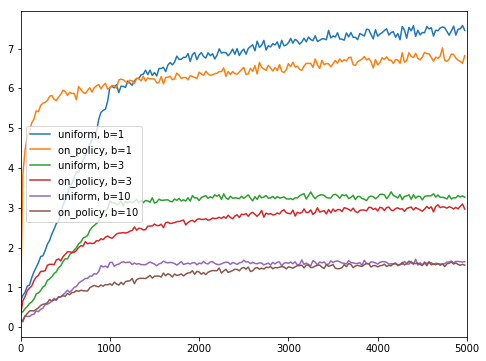

In [5]:
ax = df.plot(figsize=(8,6), xticks=range(0, 201, 40))
ax.set_xticklabels(range(0, 5001, 1000))

[Text(0, 0, '0'),
 Text(0, 0, '1000'),
 Text(0, 0, '2000'),
 Text(0, 0, '3000'),
 Text(0, 0, '4000'),
 Text(0, 0, '5000')]

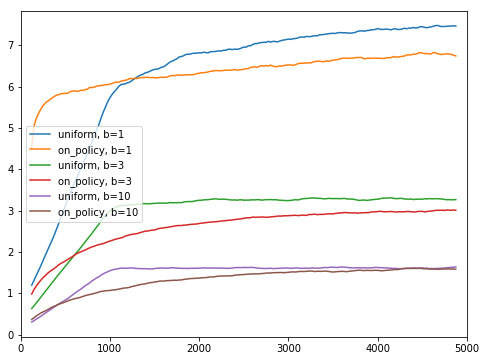

In [14]:
_df = df.rolling(10, center=True).mean()
ax = _df.plot(figsize=(8, 6), xticks=range(0, 201, 40))
ax.set_xticklabels(range(0, 5001, 1000))

In [0]:
df2 = DataFrame()
n = 100

result = np.zeros(200)
for _ in range(n):
  model = Model(states=10000, b=1)
  agent = Agent(model)
  uniform_update(agent)
  result += np.array(agent.result)
df2['uniform, b=1']=result/n

result = np.zeros(200)
for _ in range(n):
  model = Model(states=10000, b=1)
  agent = Agent(model)
  on_policy(agent)
  result += np.array(agent.result)
df2['on_policy, b=1']=result/n


result = np.zeros(200)
for _ in range(n):
  model = Model(states=10000, b=3)
  agent = Agent(model)
  uniform_update(agent)
  result += np.array(agent.result)
df2['uniform, b=3']=result/n

result = np.zeros(200)
for _ in range(n):
  model = Model(states=10000, b=3)
  agent = Agent(model)
  on_policy(agent)
  result += np.array(agent.result)
df2['on_policy, b=3']=result/n

[Text(0, 0, '0'),
 Text(0, 0, '10000'),
 Text(0, 0, '20000'),
 Text(0, 0, '30000'),
 Text(0, 0, '40000'),
 Text(0, 0, '50000')]

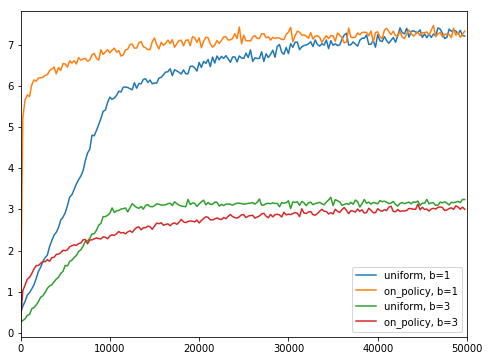

In [8]:
ax = df2.plot(figsize=(8, 6), xticks=range(0, 201, 40))
ax.set_xticklabels(range(0, 50001, 10000))

[Text(0, 0, '0'),
 Text(0, 0, '10000'),
 Text(0, 0, '20000'),
 Text(0, 0, '30000'),
 Text(0, 0, '40000'),
 Text(0, 0, '50000')]

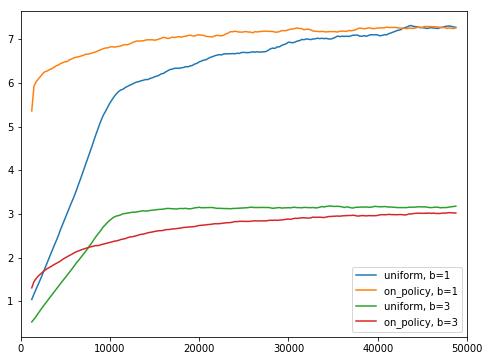

In [15]:
_df = df2.rolling(10, center=True).mean()
ax = _df.plot(figsize=(8, 6), xticks=range(0, 201, 40))
ax.set_xticklabels(range(0, 50001, 10000))